# Proyecto Integrador de Henry

## Carrera: Data Engineer
## Alumno: Diego Lopez Castan

- **RAW**: `raw.ab_nyc`
- **CORE**: `dim_date`, `dim_host`, `dim_location`, `dim_room_type`, `fact_listing_snapshot`
- **MARTS (GOLD)**: vistas que responden las 8 preguntas del negocio


In [1]:
# Instalar dependencias
!pip install psycopg2-binary sqlalchemy pandas matplotlib --quiet


## Conexión a Postgres (RDS)

Completá tus credenciales a continuación. Si tu instancia RDS exige SSL (lo normal), deja `sslmode='require'`.


In [ ]:
#Parámetros de conexión (editá estos valores)
PGHOST      = 
PGPORT      = 
PGDATABASE  =
PGUSER      = 
PGPASSWORD  = 
PGSSLMODE   = 

from sqlalchemy import create_engine, text
import pandas as pd

def get_engine():
    url = f"postgresql+psycopg2://{PGUSER}:{PGPASSWORD}@{PGHOST}:{PGPORT}/{PGDATABASE}?sslmode={PGSSLMODE}"
    return create_engine(url, pool_pre_ping=True)

def run_query(q, params=None, limit_preview=5):
    engine = get_engine()
    with engine.connect() as conn:
        df = pd.read_sql(text(q), conn, params=params or {})
    if limit_preview and len(df) > limit_preview:
        print(f"Mostrando {limit_preview} de {len(df)} filas.")
        return df.head(limit_preview)
    return df





## RAW — Tabla `raw.ab_nyc`

In [19]:
# Controlo la cantidad de registros 
run_query("select count(*) as rows_raw from raw.ab_nyc")

,rows_raw
0,48895


In [20]:
# Controlo los datos raw
run_query("select * from raw.ab_nyc limit 10")

Mostrando 5 de 10 filas.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## CORE — Tablas base

In [21]:
# Verifico las tablas de dimensiones
run_query("select * from dim_date limit 10")

Mostrando 5 de 10 filas.


,date_sk,full_date,year,quarter,month,day,day_of_week,week_of_year,is_weekend
0,20150101,2015-01-01,2015,1,1,1,4,1,False
1,20150102,2015-01-02,2015,1,1,2,5,1,False
2,20150103,2015-01-03,2015,1,1,3,6,1,True
3,20150104,2015-01-04,2015,1,1,4,7,1,True
4,20150105,2015-01-05,2015,1,1,5,1,2,False


In [22]:
run_query("select * from dim_host limit 10")

Mostrando 5 de 10 filas.


,host_sk,host_id,host_name,listings_count,is_multilister,updated_at
0,969bcd8cc5d32270930d73c095001655,72082556,Nicole,1,False,2025-09-04 19:47:16.912838+00:00
1,fab061e5732c323acae7c4aeecd0a6f9,104607422,Tunde,1,False,2025-09-04 19:47:16.912838+00:00
2,e45d32e4324f4d0228394a2ea5397787,243875619,David,2,False,2025-09-04 19:47:16.912838+00:00
3,481f283ed4a4605849f0bb26c9384c7b,121771546,Cherri,2,False,2025-09-04 19:47:16.912838+00:00
4,ac4573e248986d96713ad2956a94467d,103170539,Lalit,1,False,2025-09-04 19:47:16.912838+00:00


In [23]:
run_query("select * from dim_location limit 10")

Mostrando 5 de 10 filas.


,location_sk,neighbourhood_group,neighbourhood
0,31493eb6f78e5e39b7088a988d7a72b9,Bronx,Fieldston
1,a2063c6cd53aba708c880f6694c99814,Staten Island,St. George
2,db29bdd2de1d754c0d5c73aefc6d7ea4,Brooklyn,Crown Heights
3,a1f8ac30ae1091cabde9ae40b1a34106,Bronx,Unionport
4,dd5056040f83b4efa18e6b183beeffb3,Brooklyn,Kensington


In [24]:
run_query("select * from dim_room_type limit 10")

,room_type_sk,room_type
0,72474b03fb5506ef546c4f68ae7baecf,Entire home/apt
1,0f79b3d7b156e9a7d21e611a4150852e,Shared room
2,3c7133b7624c70e3f35f766b06e69d36,Private room


In [25]:
run_query("select * from fact_listing_snapshot limit 10")

Mostrando 5 de 10 filas.


,listing_id,date_sk,host_sk,location_sk,room_type_sk,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,is_price_zero,has_no_reviews
0,23669201,20250904,3cf2559725a9fdfa602ec8c887440f32,16062820cf22739377111ad8bf9ab7ff,72474b03fb5506ef546c4f68ae7baecf,95,45,1,0.06,0,False,False
1,18393354,20250904,4b29fa4efe4fb7bc667c7b301b74d52d,c88ee8e5999f32df289ee7574233aa75,0f79b3d7b156e9a7d21e611a4150852e,99,1,1,0.08,365,False,False
2,6385039,20250904,445e1050156c6ae8c082a8422bb7dfc0,57e4968df65eb6e0428b3f9dffb98714,3c7133b7624c70e3f35f766b06e69d36,52,2,110,2.63,220,False,False
3,6027345,20250904,445e1050156c6ae8c082a8422bb7dfc0,57e4968df65eb6e0428b3f9dffb98714,3c7133b7624c70e3f35f766b06e69d36,65,2,280,5.51,249,False,False
4,33245975,20250904,98c39996bf1543e974747a2549b3107c,e0b9d82cf22f02b7c97cf709c6281500,3c7133b7624c70e3f35f766b06e69d36,69,1,1,0.67,179,False,False


In [26]:
# Verifico las tablas de hechos
run_query("select * from fact_listing_snapshot limit 10")

Mostrando 5 de 10 filas.


,listing_id,date_sk,host_sk,location_sk,room_type_sk,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,is_price_zero,has_no_reviews
0,23669201,20250904,3cf2559725a9fdfa602ec8c887440f32,16062820cf22739377111ad8bf9ab7ff,72474b03fb5506ef546c4f68ae7baecf,95,45,1,0.06,0,False,False
1,18393354,20250904,4b29fa4efe4fb7bc667c7b301b74d52d,c88ee8e5999f32df289ee7574233aa75,0f79b3d7b156e9a7d21e611a4150852e,99,1,1,0.08,365,False,False
2,6385039,20250904,445e1050156c6ae8c082a8422bb7dfc0,57e4968df65eb6e0428b3f9dffb98714,3c7133b7624c70e3f35f766b06e69d36,52,2,110,2.63,220,False,False
3,6027345,20250904,445e1050156c6ae8c082a8422bb7dfc0,57e4968df65eb6e0428b3f9dffb98714,3c7133b7624c70e3f35f766b06e69d36,65,2,280,5.51,249,False,False
4,33245975,20250904,98c39996bf1543e974747a2549b3107c,e0b9d82cf22f02b7c97cf709c6281500,3c7133b7624c70e3f35f766b06e69d36,69,1,1,0.67,179,False,False


## MARTS — Vistas analíticas (8 preguntas)

### 1) Precio promedio por barrio y distrito

In [28]:
df_price_area = run_query("""
select dl.neighbourhood_group, dl.neighbourhood, avg(f.price)::numeric(10,2) as avg_price
from fact_listing_snapshot f
join dim_location dl on dl.location_sk = f.location_sk
group by 1,2
order by 1,2
""")

Mostrando 5 de 221 filas.


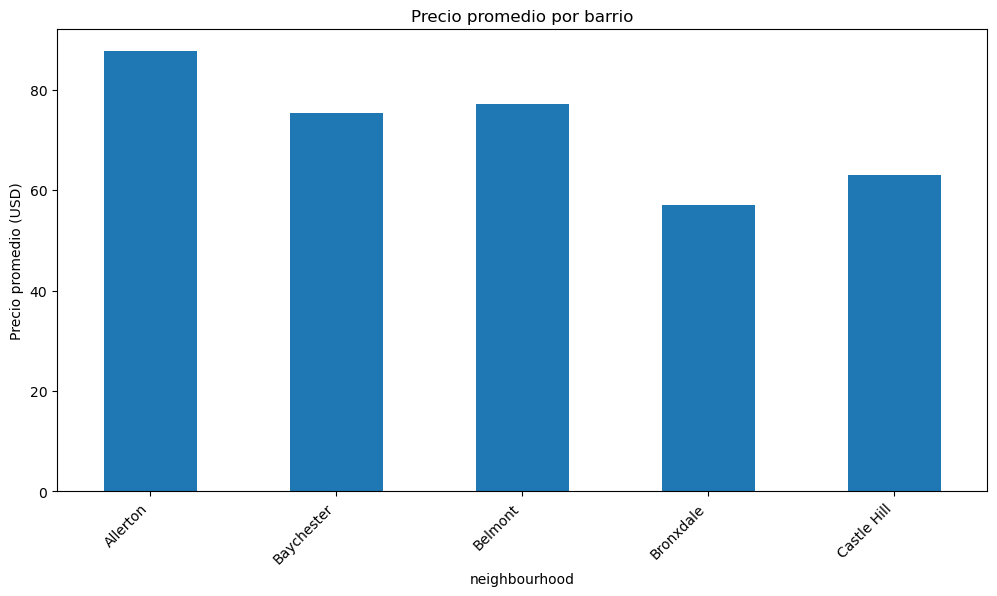

In [29]:
import matplotlib.pyplot as plt

# Agrupamos por neighbourhood_group y neighbourhood para graficar
df_price_area.plot(
    x="neighbourhood",
    y="avg_price",
    kind="bar",
    figsize=(12,6),
    title="Precio promedio por barrio",
    legend=False
)

plt.ylabel("Precio promedio (USD)")
plt.xticks(rotation=45, ha="right")
plt.show()


### 2) Tipo de habitación más ofrecido y revenue estimado

<Figure size 640x480 with 0 Axes>

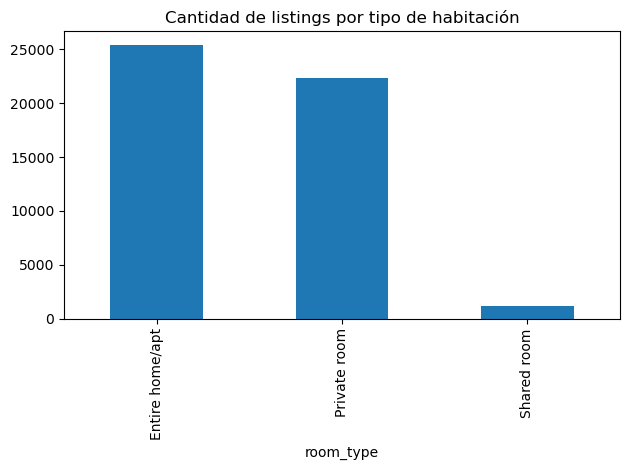

In [ ]:
df_room_rev = run_query("""
with base as (
  select room_type_sk, count(*) as listings,
         sum(greatest(365 - availability_365,0) * price)::numeric(18,2) as revenue_est
  from fact_listing_snapshot group by room_type_sk
)
select dr.room_type, b.listings, b.revenue_est
from base b join dim_room_type dr on dr.room_type_sk = b.room_type_sk
order by listings desc
""")
plot_bar(df_room_rev,'room_type','listings','Cantidad de listings por tipo de habitación')

### 3) Anfitriones con más propiedades y variación de precios

Mostrando 5 de 50 filas.


<Figure size 640x480 with 0 Axes>

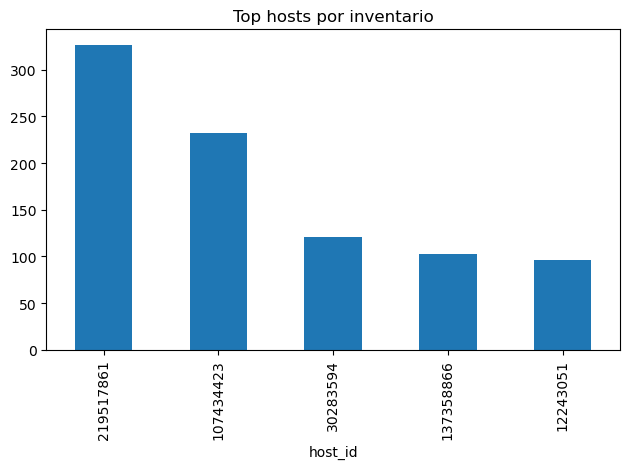

In [ ]:
df_hosts = run_query("""
select dh.host_id, dh.host_name, dh.listings_count,
       avg(f.price)::numeric(10,2) as avg_price,
       percentile_cont(0.5) within group(order by f.price) as p50_price
from fact_listing_snapshot f join dim_host dh on dh.host_sk=f.host_sk
group by dh.host_id, dh.host_name, dh.listings_count
order by dh.listings_count desc limit 50
""")
plot_bar(df_hosts.head(20),'host_id','listings_count','Top hosts por inventario')

### 4) Disponibilidad anual por barrios y tipos

In [30]:
df_avl = run_query("""
select dl.neighbourhood_group, dl.neighbourhood, dr.room_type,
       avg(f.availability_365)::numeric(10,2) as avg_availability
from fact_listing_snapshot f
join dim_location dl on dl.location_sk=f.location_sk
join dim_room_type dr on dr.room_type_sk=f.room_type_sk
group by 1,2,3 order by 1,2,3
""")

Mostrando 5 de 540 filas.


In [31]:
df_avl

,neighbourhood_group,neighbourhood,room_type,avg_availability
0,Bronx,Allerton,Entire home/apt,193.94
1,Bronx,Allerton,Private room,145.04
2,Bronx,Baychester,Entire home/apt,103.00
3,Bronx,Baychester,Private room,199.00
4,Bronx,Belmont,Entire home/apt,311.67


### 5) Evolución de reseñas por mes y distrito

In [33]:
df_reviews = run_query("""
select dd.year, dd.month, dl.neighbourhood_group,
       sum(coalesce(f.reviews_per_month,0))::numeric(10,2) as reviews_pm
from fact_listing_snapshot f
join dim_date dd on dd.date_sk=f.date_sk
join dim_location dl on dl.location_sk=f.location_sk
group by 1,2,3 order by 1,2,3
""")

In [34]:
df_reviews

,year,month,neighbourhood_group,reviews_pm
0,2025,9,Bronx,1609.94
1,2025,9,Brooklyn,21104.98
2,2025,9,Manhattan,21158.08
3,2025,9,Queens,8879.05
4,2025,9,Staten Island,587.99


### 6) Barrios con mayor concentración de alojamientos activos

Mostrando 5 de 218 filas.


<Figure size 640x480 with 0 Axes>

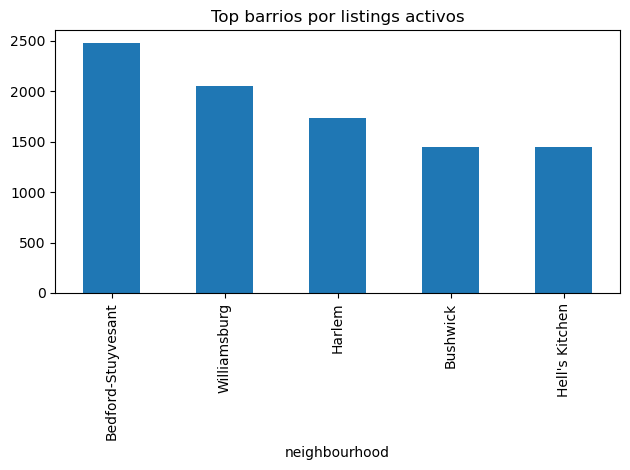

In [ ]:
df_active = run_query("""
select dl.neighbourhood_group, dl.neighbourhood, count(*) as active_listings
from fact_listing_snapshot f
join dim_location dl on dl.location_sk=f.location_sk
where price>0 and availability_365>0
group by 1,2 order by active_listings desc
""")
plot_bar(df_active.head(20),'neighbourhood','active_listings','Top barrios por listings activos')

### 7) Distribución de precios y outliers

In [16]:
df_outliers = run_query("""
with stats as (
  select dl.neighbourhood_group,
         percentile_cont(0.25) within group(order by f.price) as p25,
         percentile_cont(0.50) within group(order by f.price) as p50,
         percentile_cont(0.75) within group(order by f.price) as p75
  from fact_listing_snapshot f
  join dim_location dl on dl.location_sk=f.location_sk
  group by 1
)
select s.neighbourhood_group, s.p25, s.p50, s.p75
from stats s
""")

In [17]:
df_outliers

,neighbourhood_group,p25,p50,p75
0,Bronx,45.0,65.0,99.0
1,Brooklyn,60.0,90.0,150.0
2,Manhattan,95.0,150.0,220.0
3,Queens,50.0,75.0,110.0
4,Staten Island,50.0,75.0,110.0


### 8) Relación disponibilidad vs reseñas

In [12]:
df_corr = run_query("""
select dl.neighbourhood_group,
       corr((365 - f.availability_365)::numeric, coalesce(f.reviews_per_month,0)::numeric) as corr_occ_reviews
from fact_listing_snapshot f
join dim_location dl on dl.location_sk=f.location_sk
group by 1 order by 1
""")

In [13]:
df_corr

,neighbourhood_group,corr_occ_reviews
0,Bronx,-0.072276
1,Brooklyn,-0.218585
2,Manhattan,-0.112628
3,Queens,-0.136371
4,Staten Island,-0.047283
